# Import packages

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import random
global_lambdas = []
global_gammas = []

# Generate data

In [141]:
mu, sigma = 0, 1 # mean and standard deviation
N = 100000

### Generate z_vec

Generate vector z of hidden states as follows:

$$z_{i} = \gamma z_{i-1} + \delta_i \hspace{0.5cm} \text{with } z_0 = 0, \hspace{0.2cm} \gamma = 0.5, \hspace{0.2cm} \delta = norm(0, 1)$$

In [142]:
z0 = 0
gamma = 0.1
delta = np.random.normal(mu, sigma, N)
z_vec = []
z_vec.append(gamma*z0 + delta[0])
for i in range(1, N):
    z_vec.append(gamma*z_vec[i-1] + delta[i])  

# convert to np array
z_vec = np.array(z_vec)

### Generate x_vec

Generate vector x of observations as follows:

$$x_{i} = norm(z_{i},1) \hspace{0.5cm}$$

In [143]:
x_vec = []
for i in range(N):
    x_i = np.random.normal(z_vec[i], sigma)
    #x_i = z_vec[i]
    x_vec.append(x_i)

# convert to np array
x_vec = np.array(x_vec)

# Algorithm

$$ \underset{z}{min} \sum_{i} \left[\left(x_i - z_i \right)^2 + \lambda \left(z_i - \gamma z_{i-1}\right)^2\right] = \sum_{i=1}^{m} \left(x_i - z_i \right)^2 + \sum_{i=0}^{m-1}\lambda \left(y_{i+1} - \gamma z_{i}\right)^2$$

Taking derivative over $z_i$ gives us:
$$ -2\left(x_i - z_i \right) - 2\lambda \gamma \left(y_{i+1} - \gamma z_{i}\right) = 0 \Leftrightarrow z_i = \frac{2\gamma \lambda y_{i+1} + 2x_i}{2 + 2\gamma^2 \lambda}$$

$$z_m = x_m \text{ if } i = m$$

**Step 1**: Estimate $\gamma$

**Step 2**: Estimate $z$ from the just-found $\gamma$

In [144]:
def step_one(lmda, gamma, x_vec, N, y_vec):
    z = []
    for i in range(N-1):
        if y_vec is None:
            z_i = (2.0*x_vec[i])/(2.0+2.0*(gamma**2)*lmda)
        else:
            z_i = (2.0*lmda*gamma*y_vec[i+1] + 2.0*x_vec[i])/(2.0+2.0*(gamma**2)*lmda)
        z.append(z_i)
    z.append(x_vec[N-1])
    z = np.array(z, dtype='float')
    y_vec = np.array(y_vec, dtype='float')
    
    MSE = None
    if y_vec is not None:
        MSE = np.sum((y_vec - z)**2)/N
    return z, MSE

In [145]:
def step_two(z):
    Z = []
    Z.append(z0)
    for i in range(N-1):
        Z.append(z[i])
    Z = np.matrix(Z, dtype='float')
    ZZ = np.matmul(Z, Z.transpose())
    ZZ = np.linalg.pinv(ZZ)
    ZZ_vec = np.matmul(Z, z.transpose())
    gamma_vec = ZZ*ZZ_vec
    gamma = gamma_vec.item(0)
    return gamma

In [146]:
def repeat_until_convergence(lmda, x_vec, z_vec, threshold):
    gamma = random.randrange(0,1)
    iteration = 0
    while True:
        if iteration == 0:
            y_vec = None
        else:
            y_vec = found_z
        found_z, MSE = step_one(lmda, gamma, x_vec, N, y_vec)
        gamma = step_two(found_z)
        iteration += 1
        print(MSE)
        if MSE != None and MSE < threshold:
            gammas.append(gamma)
            print("When lmda is", lmda, ", the found gamma is:", gamma)
            break

In [147]:
lambdas = [0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
gammas = []
for lmda in lambdas:
    threshold = 0.000000001
    repeat_until_convergence(lmda, x_vec, z_vec, threshold)

nan
4.757461224789011e-09
4.810162293735796e-15
When lmda is 0.001 , the found gamma is: 0.04857493012514536
nan
1.1893429009024364e-07
3.0061798229399648e-12
When lmda is 0.005 , the found gamma is: 0.04877082223881788
nan
4.7552438446796286e-05
4.802711246770162e-07
4.800705382662243e-09
4.790568785301112e-11
When lmda is 0.1 , the found gamma is: 0.0539331323216652
nan
0.00019012022560871054
7.669947972512904e-06
3.0604338069705416e-07
1.2166898424594922e-08
4.833107168602712e-10
When lmda is 0.2 , the found gamma is: 0.060681257528746285
nan
0.00042756921140450744
3.874332894016221e-05
3.4691944137433105e-06
3.08760809492345e-07
2.742286435799085e-08
2.434014523405818e-09
2.1599762325880848e-10
When lmda is 0.3 , the found gamma is: 0.06933739652303765
nan
0.0007597654350970799
0.00012213304517774104
1.9375653354975343e-05
3.0460569334470016e-06
4.7681860327976256e-07
7.450367054548505e-08
1.1632713650661984e-08
1.8157504309597106e-09
2.833873039015221e-10
When lmda is 0.4 , the fo

In [148]:
global_lambdas.append(lambdas)
global_gammas.append(gammas)

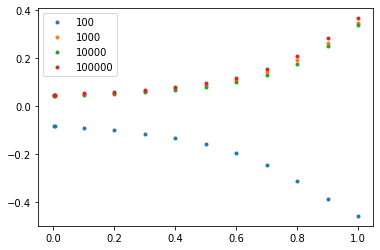

In [149]:
for i in range(len(global_lambdas)):
    plt.plot(global_lambdas[i], global_gammas[i], '.')

dt = ["100", "1000", "10000", "100000"]
plt.legend(dt)